# A simple job shop example
In this notebook, we show you how to model and solve a simple job shop problem with PyJobShop.

A scheduling problem consists of three main elements:
- **Machine**: a machine is a unary resource that can process an operation.
- **Operation**: an operation is a processing task that needs to be completed.
- **Job**: this represents the collection of operations that need to be performed, as is used to measure performance such as completion times or tardiness.

In the job shop problem, there are $n$ jobs and $m$ machines. For each job, we have a sequence of operations
Let's consider the job shop example from [Google OR-Tools](https://developers.google.com/optimization/scheduling/job_shop).

In [9]:
data = [
    [(0, 3), (1, 2), (2, 2)],
    [(0, 2), (2, 1), (1, 4)],
    [(1, 4), (2, 3)],
]

NUM_MACHINES = 3

Here we have three jobs. Each job consists of a list of tuples, each of which represents an operation, and the first index denotes the machine that can process it and the second 

In [10]:
from pyjobshop import Model, TimingPrecedence, plot, result2solution

In [11]:
model = Model()

In [12]:
machines = [model.add_machine() for _ in range(NUM_MACHINES)]

In [13]:
jobs = [model.add_job() for _ in range(len(data))]

In [14]:
for job_idx, operations in enumerate(data):
    ops = []

    for machine_idx, duration in operations:
        operation = model.add_operation()
        model.assign_job_operations(jobs[job_idx], [operation])
        model.add_processing_time(machines[machine_idx], operation, duration)

    for idx in range(len(ops)):
        model.add_timing_precedence(
            ops[idx],
            ops[idx + 1],
            TimingPrecedence.END_BEFORE_START,
        )

In [15]:
result = model.solve()

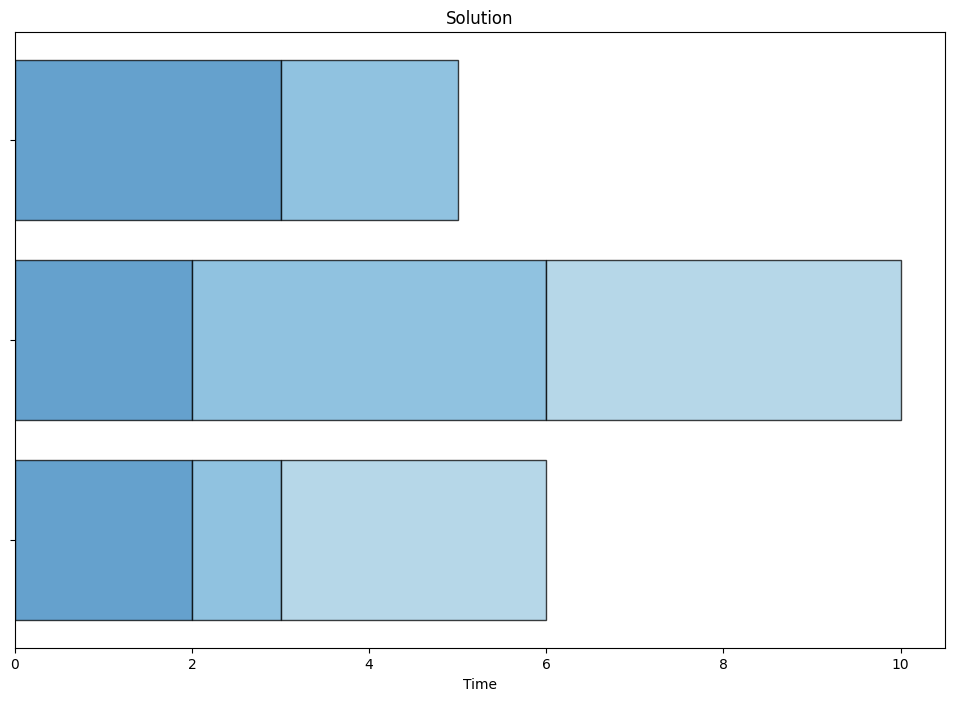

In [16]:
data = model.data()
solution = result2solution(data, result)

plot(data, solution)